In [17]:
import pandas as pd
import os
from glob import glob

In [18]:
# 1. Définir le répertoire contenant vos fichiers parquet
data_dir = "crypto_data/pair_data/"

# 2. Lister tous les fichiers .parquet
all_files = glob(os.path.join(data_dir, "*.parquet"))
print("Fichiers trouvés :", all_files)


Fichiers trouvés : ['crypto_data/pair_data/ethusdc_1d.parquet', 'crypto_data/pair_data/btcusdc_1h.parquet', 'crypto_data/pair_data/btcusdc_1d.parquet', 'crypto_data/pair_data/ethusdc_1h.parquet']


In [19]:
# 3. Charger le fichier BTCUSDC en timeframe 1d
btc_file = "crypto_data/pair_data/btcusdc_1d.parquet"
df = pd.read_parquet(btc_file)

# 4. Vérifier le chargement
print(df.shape)
df.tail()

(2195, 14)


,open_time,open,high,low,close,volume,close_time,quote_asset_volume,nb_trades,taker_buy_base,taker_buy_quote,ignore,open_dt,close_dt
2190,1748131200000,107800.01,109375.67,106610.00,109058.00,2610.10978,1748217599999,281167097.54639220,418715,1294.37363000,139500243.99711760,0,2025-05-25 00:00:00+00:00,2025-05-25 23:59:59.999000+00:00
2191,1748217600000,109058.00,110480.74,108736.84,109478.01,3722.40078,1748303999999,407794964.65870200,523497,1679.47246000,184147167.91161310,0,2025-05-26 00:00:00+00:00,2025-05-26 23:59:59.999000+00:00
2192,1748304000000,109478.01,110799.10,107547.13,108992.92,4879.95661,1748390399999,534502366.33216820,938591,2301.80236000,252208426.78174640,0,2025-05-27 00:00:00+00:00,2025-05-27 23:59:59.999000+00:00
2193,1748390400000,108992.92,109334.92,106814.85,107817.98,3549.21863,1748476799999,383864583.58088320,825601,1602.79008000,173367211.77907440,0,2025-05-28 00:00:00+00:00,2025-05-28 23:59:59.999000+00:00
2194,1748476800000,107817.98,108676.76,106993.95,108628.18,1109.68116,1748563199999,119799152.75610070,317267,565.85991000,61099663.05674390,0,2025-05-29 00:00:00+00:00,2025-05-29 23:59:59.999000+00:00


In [20]:
# Colonnes à garder
cols_to_keep = ['open_dt', 'open', 'high', 'low', 'close', 'volume']

# 1. Sélectionner uniquement ces colonnes
df = df[cols_to_keep]

# 2. Renommer la colonne de date
df = df.rename(columns={'open_dt': 'timestamp'})

# 3. Convertir en datetime et mettre en index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp').sort_index()

# 4. Vérifier le résultat
print(df.columns.tolist())
df.head()

['open', 'high', 'low', 'close', 'volume']


,open,high,low,close,volume
timestamp,,,,,
2018-12-15 00:00:00+00:00,3200.00,3312.32,3000.00,3183.47,283.213859
2018-12-16 00:00:00+00:00,3183.47,3257.31,3178.54,3199.27,423.048529
2018-12-17 00:00:00+00:00,3192.69,3587.35,3187.25,3494.65,1163.940291
2018-12-18 00:00:00+00:00,3507.62,3683.35,3428.34,3670.11,1251.139627
2018-12-19 00:00:00+00:00,3673.18,3920.00,3618.53,3676.32,2655.242827


In [21]:
# Calculer les EMA à 12 et 26 périodes sur la colonne 'close'
df_indicateurs = df.copy()
df_indicateurs['EMA12'] = df_indicateurs['close'].ewm(span=12, adjust=False).mean()
df_indicateurs['EMA26'] = df_indicateurs['close'].ewm(span=26, adjust=False).mean()

df_indicateurs.head()

,open,high,low,close,volume,EMA12,EMA26
timestamp,,,,,,,
2018-12-15 00:00:00+00:00,3200.00,3312.32,3000.00,3183.47,283.213859,3183.470000,3183.470000
2018-12-16 00:00:00+00:00,3183.47,3257.31,3178.54,3199.27,423.048529,3185.900769,3184.640370
2018-12-17 00:00:00+00:00,3192.69,3587.35,3187.25,3494.65,1163.940291,3233.400651,3207.604047
2018-12-18 00:00:00+00:00,3507.62,3683.35,3428.34,3670.11,1251.139627,3300.586705,3241.863747
2018-12-19 00:00:00+00:00,3673.18,3920.00,3618.53,3676.32,2655.242827,3358.391827,3274.045692


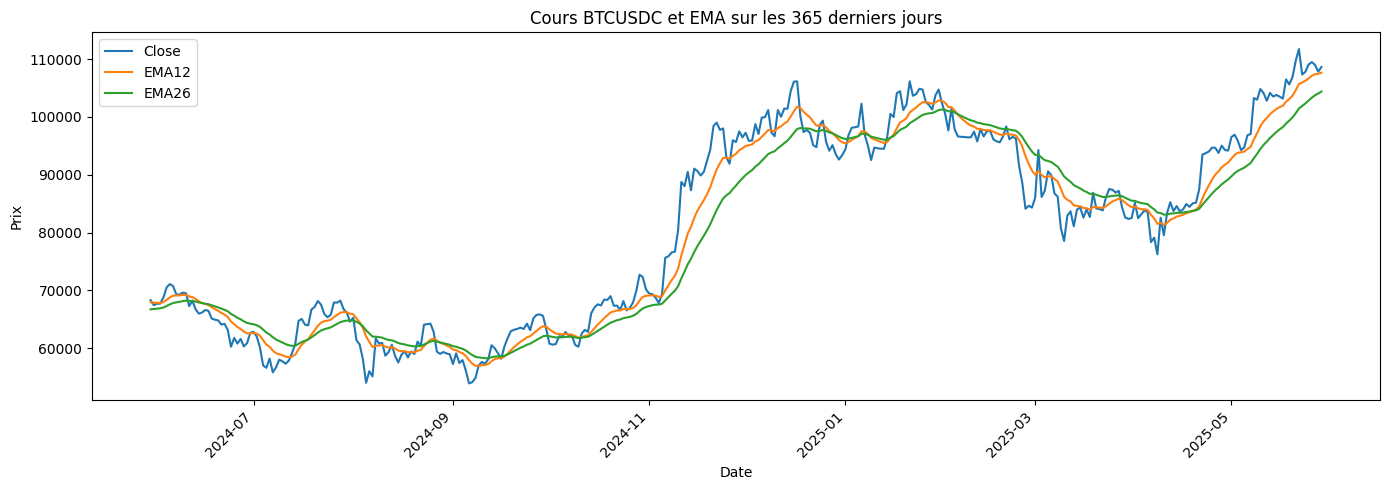

In [22]:
import matplotlib.pyplot as plt

# Nombre de jours à afficher
X = 365  
df_last = df_indicateurs.tail(X)

# 1. Créer un subplot avec taille personnalisée
fig, ax = plt.subplots(figsize=(14, 5))  # largeur=14, hauteur=7 pouces

# 2. Tracer les courbes
ax.plot(df_last.index, df_last['close'], label='Close')
ax.plot(df_last.index, df_last['EMA12'], label='EMA12')
ax.plot(df_last.index, df_last['EMA26'], label='EMA26')

# 3. Pivoter les labels de dates de 45°
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# 4. Étiquettes et légende
ax.set_xlabel('Date')
ax.set_ylabel('Prix')
ax.set_title(f'Cours BTCUSDC et EMA sur les {X} derniers jours')
ax.legend()

# 5. Mise en page et affichage
plt.tight_layout()
plt.show()


In [50]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

# --- Paramètres utilisateur ---
X = 365 # Nombre de barres à backtester
INITIAL_CAPITAL = 3000 # Capital de départ (USDC)
COMMISSION = 0.0005 # 0,05 % de frais (réduit)
DATA_FILE = "crypto_data/pair_data/btcusdc_1d.parquet"
OUTPUT_DIR = "crypto_data/strategy/008"
STATS_FILE = os.path.join(OUTPUT_DIR, "ema_strategy_stats.csv")

# --- 1) Chargement et préparation des données ---
df = pd.read_parquet(DATA_FILE)
df = df.rename(columns={
    'open_dt': 'Date',
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
})
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()

# Ne conserver que les colonnes utiles
df_bt = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()

# CONVERSION EN SATOSHIS pour éviter le problème de trading fractionnel
# 1 BTC = 100,000,000 satoshis
SATOSHIS_PER_BTC = 100_000_000

# Convertir tous les prix en satoshis
df_bt['Open'] = df_bt['Open'] / SATOSHIS_PER_BTC
df_bt['High'] = df_bt['High'] / SATOSHIS_PER_BTC
df_bt['Low'] = df_bt['Low'] / SATOSHIS_PER_BTC
df_bt['Close'] = df_bt['Close'] / SATOSHIS_PER_BTC

# Calculer les EMA 12 et EMA 26 sur les prix en satoshis
df_bt['EMA12'] = df_bt['Close'].ewm(span=12, adjust=False).mean()
df_bt['EMA26'] = df_bt['Close'].ewm(span=26, adjust=False).mean()

# Garder uniquement les X dernières lignes
df_bt = df_bt.tail(X)

print(f"Prix BTC converti en satoshis - Exemple: {df_bt['Close'].iloc[-1]:.8f} USDC/satoshi")
print(f"Cela équivaut à {df_bt['Close'].iloc[-1] * SATOSHIS_PER_BTC:.2f} USDC/BTC")

# --- 2) Définition de la stratégie EMA Crossover ---
class EMACrossoverStrategy(Strategy):
    position_size = 0.5  # 50% de l'equity par position
    risk_percent = 0.01  # 1% de l'equity risqué par trade
    tp_sl_ratio = 3.5  # Ratio Take Profit / Stop Loss de 2:1
    
    def init(self):
        # On enregistre les EMA pré-calculées pour qu'elles apparaissent sur le plot
        self.ema_short = self.I(lambda x: x,
                               self.data.EMA12,
                               name='EMA12')
        self.ema_long = self.I(lambda x: x,
                              self.data.EMA26,
                              name='EMA26')
    
    def next(self):
        # Vérifier si on n'a pas déjà une position ouverte
        if self.position:
            return
        
        # Condition de crossover : EMA12 croise au-dessus de EMA26
        if crossover(self.ema_short, self.ema_long):
            price_satoshis = self.data.Close[-1]  # Prix en USDC/satoshi
            price_btc = price_satoshis * SATOSHIS_PER_BTC  # Prix en USDC/BTC pour affichage
            
            # Calculer la valeur de la position (50% de l'equity)
            position_value = self.equity * self.position_size
            
            # Calculer la quantité de satoshis pour cette position
            satoshis_quantity = position_value / price_satoshis
            
            # Calculer le montant risqué (1% de l'equity)
            risk_amount = self.equity * self.risk_percent
            
            # Calculer le SL basé sur le risque par satoshi
            sl_per_satoshi = risk_amount / satoshis_quantity
            stop_price = price_satoshis - sl_per_satoshi
            
            # Calculer le TP avec ratio 2:1
            tp_per_satoshi = sl_per_satoshi * self.tp_sl_ratio
            take_price = price_satoshis + tp_per_satoshi
            
            # print(f"=== Signal d'achat ===")
            # print(f"Prix BTC: {price_btc:.2f} USDC")
            # print(f"Prix satoshi: {price_satoshis:.8f} USDC")
            # print(f"Equity: {self.equity:.2f} USDC")
            # print(f"Taille position: {self.position_size*100}% = {position_value:.2f} USDC")
            # print(f"Quantité satoshis: {satoshis_quantity:.0f}")
            # print(f"Équivalent BTC: {satoshis_quantity/SATOSHIS_PER_BTC:.6f}")
            # print(f"Risque: {self.risk_percent*100}% = {risk_amount:.2f} USDC")
            # print(f"Stop Loss: {stop_price:.8f} USDC/satoshi")
            # print(f"Take Profit: {take_price:.8f} USDC/satoshi")
            # print(f"Ratio R:R = 1:{self.tp_sl_ratio}")
            
            # Vérifier que les niveaux sont cohérents
            if stop_price > 0 and take_price > price_satoshis:
                self.buy(size=self.position_size, sl=stop_price, tp=take_price)
            else:
                print("Niveaux SL/TP invalides - trade annulé")

# --- 3) Exécution du backtest ---
bt = Backtest(
    df_bt,
    EMACrossoverStrategy,
    cash=INITIAL_CAPITAL,
    commission=COMMISSION,
    trade_on_close=True,
    exclusive_orders=True
)

stats = bt.run()
print(stats)

# --- 4) Enregistrement des statistiques ---
os.makedirs(OUTPUT_DIR, exist_ok=True)
stats.to_csv(STATS_FILE, header=True)
print(f"Stats enregistrées dans : {STATS_FILE}")

# --- 5) Affichage du graphique de performance ---
bt.plot()
plt.show()

Prix BTC converti en satoshis - Exemple: 0.00108628 USDC/satoshi
Cela équivaut à 108628.18 USDC/BTC
Start                     2024-05-30 00:00...
End                       2025-05-29 00:00...
Duration                    364 days 00:00:00
Exposure Time [%]                     8.21918
Equity Final [$]                   3363.85792
Equity Peak [$]                    3363.85792
Commissions [$]                       9.55744
Return [%]                            12.1286
Buy & Hold Return [%]                58.98045
Return (Ann.) [%]                     12.1286
Volatility (Ann.) [%]                 7.54583
CAGR [%]                             12.16387
Sharpe Ratio                          1.60732
Sortino Ratio                         3.31572
Calmar Ratio                          4.09058
Alpha [%]                            10.22524
Beta                                  0.03227
Max. Drawdown [%]                      -2.965
Avg. Drawdown [%]                    -1.28572
Max. Drawdown Duration    

/Users/sloutmyv/Documents/Github/trading-overview/.venv/lib/python3.12/site-packages/bokeh/util/serialization.py:242: UserWarning: no explicit representation of timezones available for np.datetime64
  return convert(array.astype("datetime64[us]"))


In [49]:
"""
Sweep de paramètres pour la stratégie EMA Crossover
--------------------------------------------------
Ce script balaie plusieurs couples (risk_percent, tp_sl_ratio), exécute un backtest
pour chaque combinaison et synthétise les métriques clés (Equity finale, CAGR,
Sharpe, Win Rate) dans des matrices CSV + heatmaps.

Dépendances :
    pip install backtesting pandas matplotlib numpy

Auteur : Syl (template)
Date   : 2025-05-30
"""

import os
from datetime import datetime
from typing import List

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

# ----------------------- Paramètres utilisateur ---------------------------- #
# Données & backtest
X: int = 365  # nombre de bougies à conserver pour le backtest
INITIAL_CAPITAL: float = 3_000  # Cash de départ (USDC)
COMMISSION: float = 0.0005  # 0,05 %
DATA_FILE: str = "crypto_data/pair_data/btcusdc_1d.parquet"
OUTPUT_DIR: str = "crypto_data/strategy/008"
RUN_ID: str = datetime.now().strftime("%Y%m%d_%H%M%S")  # pour versionner les sorties

# Grilles de paramètres à tester
RISK_PERCENTS: List[float] = [0.005, 0.01, 0.015, 0.02]  # 0,5 % ; 1 % ; 2 %
TP_SL_RATIOS: List[float] = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4]

# ---------------------- Préparation des données ---------------------------- #

def load_data(path: str, nb_rows: int) -> pd.DataFrame:
    """Charge les données et retourne un DataFrame formaté pour Backtesting.py"""
    df = pd.read_parquet(path)
    df = df.rename(
        columns={
            "open_dt": "Date",
            "open": "Open",
            "high": "High",
            "low": "Low",
            "close": "Close",
            "volume": "Volume",
        }
    )
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.set_index("Date").sort_index()

    satoshis_per_btc = 100_000_000
    df[["Open", "High", "Low", "Close"]] = df[["Open", "High", "Low", "Close"]] / satoshis_per_btc

    # EMA12 / EMA26
    df["EMA12"] = df["Close"].ewm(span=12, adjust=False).mean()
    df["EMA26"] = df["Close"].ewm(span=26, adjust=False).mean()

    return df[["Open", "High", "Low", "Close", "Volume", "EMA12", "EMA26"]].tail(nb_rows)


data_bt = load_data(DATA_FILE, X)
SATOSHIS_PER_BTC = 100_000_000  # const globale pour la stratégie

# ---------------------- Fabrique de stratégies ----------------------------- #

def make_strategy(risk_percent: float, tp_sl_ratio: float):
    """Fabrique dynamiquement une Strategy avec les deux hyperparamètres."""

    class EMACrossoverStrategy(Strategy):
        position_size = 0.5  # 50 % de l'equity

        def init(self):
            self.ema_short = self.I(lambda x: x, self.data.EMA12, name="EMA12")
            self.ema_long = self.I(lambda x: x, self.data.EMA26, name="EMA26")

        def next(self):
            if self.position:
                return

            if crossover(self.ema_short, self.ema_long):
                price_sat = self.data.Close[-1]
                position_value = self.equity * self.position_size
                sat_qty = position_value / price_sat
                risk_amount = self.equity * self.risk_percent

                sl_per_sat = risk_amount / sat_qty
                stop_price = price_sat - sl_per_sat
                take_price = price_sat + sl_per_sat * self.tp_sl_ratio

                if stop_price > 0 and take_price > price_sat:
                    self.buy(size=self.position_size, sl=stop_price, tp=take_price)

    # Injecte les hyperparamètres après la création de la classe pour éviter
    # le NameError dû au scope des class bodies.
    EMACrossoverStrategy.risk_percent = risk_percent
    EMACrossoverStrategy.tp_sl_ratio = tp_sl_ratio
    EMACrossoverStrategy.__name__ = (
        f"EMACross_r{int(risk_percent*10000)}bp_rr{tp_sl_ratio:.1f}"
    )

    return EMACrossoverStrategy

# --------------------------- Boucle de sweep ------------------------------- #

results = []

for rp in RISK_PERCENTS:
    for rr in TP_SL_RATIOS:
        Strat = make_strategy(rp, rr)
        bt = Backtest(
            data_bt,
            Strat,
            cash=INITIAL_CAPITAL,
            commission=COMMISSION,
            trade_on_close=True,
            exclusive_orders=True,
        )
        stats = bt.run()

        results.append(
            {
                "risk_percent": rp,
                "tp_sl_ratio": rr,
                "Equity_Final_$": stats["Equity Final [$]"],
                "CAGR_%": stats["Return [%]"],
                "Sharpe": stats["Sharpe Ratio"],
                "WinRate_%": stats["Win Rate [%]"],
                "Trades": stats["# Trades"],
            }
        )
        print(
            f"Test rp={rp:.3%}, rr={rr:.1f} → Equity {stats['Equity Final [$]']:.2f} $"
        )

# ---------------------------- Synthèse & I/O ------------------------------- #

os.makedirs(OUTPUT_DIR, exist_ok=True)
outputs_subdir = os.path.join(OUTPUT_DIR, f"param_sweep_{RUN_ID}")
os.makedirs(outputs_subdir, exist_ok=True)

# Tableau brut
raw_df = pd.DataFrame(results)
raw_csv = os.path.join(outputs_subdir, "results_raw.csv")
raw_df.to_csv(raw_csv, index=False)
print(f"CSV brut → {raw_csv}")

# Matrices pivot & heatmaps
for metric in ["Equity_Final_$", "CAGR_%", "Sharpe", "WinRate_%"]:
    matrix = raw_df.pivot(index="risk_percent", columns="tp_sl_ratio", values=metric)
    matrix_path = os.path.join(outputs_subdir, f"matrix_{metric}.csv")
    matrix.to_csv(matrix_path)
    print(f"Matrice {metric} → {matrix_path}")

    # Heatmap (facultatif)
    fig, ax = plt.subplots(figsize=(8, 4))
    cax = ax.imshow(matrix, aspect="auto", origin="lower")
    ax.set_xticks(range(len(matrix.columns)))
    ax.set_xticklabels(matrix.columns)
    ax.set_yticks(range(len(matrix.index)))
    ax.set_yticklabels(matrix.index)
    ax.set_xlabel("tp_sl_ratio")
    ax.set_ylabel("risk_percent")
    ax.set_title(metric)
    plt.colorbar(cax, label=metric)
    heatmap_path = os.path.join(outputs_subdir, f"heatmap_{metric}.png")
    plt.savefig(heatmap_path, dpi=300, bbox_inches="tight")
    plt.close(fig)

print("\nSweep terminé. Consultez le dossier de sortie pour les matrices & graphiques.")

Test rp=0.500%, rr=1.0 → Equity 3020.84 $
Test rp=0.500%, rr=1.5 → Equity 3013.16 $
Test rp=0.500%, rr=2.0 → Equity 3035.64 $
Test rp=0.500%, rr=2.5 → Equity 3058.23 $
Test rp=0.500%, rr=3.0 → Equity 3080.94 $
Test rp=0.500%, rr=3.5 → Equity 3103.75 $
Test rp=0.500%, rr=4.0 → Equity 3126.68 $
Test rp=1.000%, rr=1.0 → Equity 3112.12 $
Test rp=1.000%, rr=1.5 → Equity 3189.90 $
Test rp=1.000%, rr=2.0 → Equity 3269.23 $
Test rp=1.000%, rr=2.5 → Equity 3235.76 $
Test rp=1.000%, rr=3.0 → Equity 3299.34 $
Test rp=1.000%, rr=3.5 → Equity 3363.86 $
Test rp=1.000%, rr=4.0 → Equity 3264.49 $
Test rp=1.500%, rr=1.0 → Equity 3173.79 $
Test rp=1.500%, rr=1.5 → Equity 3172.03 $
Test rp=1.500%, rr=2.0 → Equity 3266.11 $
Test rp=1.500%, rr=2.5 → Equity 3362.26 $
Test rp=1.500%, rr=3.0 → Equity 3261.87 $
Test rp=1.500%, rr=3.5 → Equity 2918.94 $
Test rp=1.500%, rr=4.0 → Equity 2939.73 $
Test rp=2.000%, rr=1.0 → Equity 3236.21 $
Test rp=2.000%, rr=1.5 → Equity 3233.04 $
Test rp=2.000%, rr=2.0 → Equity 31